# Abstract:

In the evolving landscape of artificial intelligence, the integration of Convolutional Neural Networks (CNNs) with Long Short-Term Memory (LSTM) networks presents a compelling frontier for deep learning exploration. The fusion of CNNs, renowned for their prowess in image recognition through the extraction of hierarchical features from visual inputs, with LSTMs, a variant of Recurrent Neural Networks (RNNs) designed to address the vanishing gradient problem by effectively capturing long-term dependencies, signifies a bold venture into uncharted territories of machine learning. By employing the MNIST dataset, a foundational benchmark in the field, this hybrid approach not only leverages the CNN's capability to discern intricate patterns within digit images but also explores how the LSTM's sequential data processing might enhance or impede the network's adaptability to the diverse manifestations of numerical figures. This endeavor is driven by a mathematical curiosity, aiming to unveil whether the LSTM's memory function can refine the CNN's performance by preserving essential information over extended periods, or conversely, if it introduces rigidity, thus hindering the network's ability to acclimate to the fluctuating characteristics of the dataset.

Anticipating the outcomes of this experiment, one might foresee two distinct possibilities: On one hand, the synergistic combination could yield a more sophisticated neural network architecture, one that benefits from the LSTM's capacity to remember and utilize past insights, thereby augmenting the CNN's accuracy in image classification tasks. On the other hand, this amalgamation might prove to be a double-edged sword, as the very mechanisms designed to retain long-term dependencies could potentially obstruct the system's flexibility in adapting to the nuances of each numeral

Imports necessary libraries and modules for building and training a deep learning model using TensorFlow and Keras. It includes:

numpy for numerical computations,
matplotlib.pyplot for plotting graphs,
tensorflow and its high-level Keras API for constructing and training neural network models.
The imports from tensorflow.keras are specifically for building a Sequential model and include various layers like Dense for fully connected layers, Flatten for flattening input dimensions, Conv2D for convolutional layers, MaxPooling2D for pooling layers, LSTM for long short-term memory layers, and Reshape for altering the shape of inputs. Additionally, it imports to_categorical for converting labels to one-hot encoded vectors and mnist from tensorflow.keras.datasets for accessing the MNIST dataset. The duplicate import line can be cleaned up as it repeats the same layer and model imports.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Reshape
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LSTM, Reshape
from tensorflow.keras.models import Sequential

 The MNIST dataset, consisting of 60,000 28x28 grayscale images of handwritten digits, is loaded and normalized so that the pixel values are in the range [0, 1]. The labels are converted to one-hot encoded vectors to match the output format expected by the neural network.

In [5]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

This code snippet is normalizing image data for both training and testing datasets by scaling their pixel values to fall within a range of 0 to 1. This is achieved by dividing the pixel values of each image in the train_images and test_images arrays by 255.0, the maximum possible pixel value in an 8-bit image. Normalization is a common preprocessing step in image processing and machine learning to make the training process faster and more stable.

In [6]:
# Normalize the images to have values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

This code snippet transforms the labels in the training and testing datasets into one-hot encoded vectors using the to_categorical function. One-hot encoding is a process where categorical labels are converted into a format that can be provided to machine learning algorithms to improve prediction and classification. Each label is represented as a vector that is all zeros except for a single one at the index of the class the label represents. This method is commonly used for preparing categorical data in machine learning preprocessing.

In [7]:
# Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

This code outlines a neural network model structured in a sequential manner, starting with a convolutional layer (Conv2D) for initial image feature extraction. It incorporates max pooling to reduce the feature map size, followed by a reshape operation to prepare the data for an LSTM layer, which processes data sequences. The model concludes with a dense layer employing a softmax activation function, designed for classifying inputs into ten distinct categories, suitable for digit classification tasks.

In [12]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Reshape((13, 13*32)),  # Adjusting reshape dimensions to match actual output
    LSTM(128, activation='relu', return_sequences=False),
    Dense(10, activation='softmax')
])

The Flatten layer simplifies complex input data into a one-dimensional format, while Dense layers, with 128 and 64 neurons each, utilize ReLU activation to extract intricate features. These layers collectively orchestrate the transformation of data, culminating in the output layer's classification prowess, facilitated by ten neurons and softmax activation.
This will be compared to the more complex amalgamation of CNN and LSTM

In [9]:
# model = Sequential([
#     Flatten(input_shape=(28, 28)),  # Flattens the input
#     Dense(128, activation='relu'),  # First hidden layer with 128 neurons
#     Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
#     Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class)
# ])

This code configures the neural network model for training by specifying the 'adam' optimizer for gradient descent, using 'categorical_crossentropy' as the loss function for multi-class classification, and tracking the 'accuracy' metric to evaluate perf|ormance during training and testing.

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


This code initiates the training of the neural network model on the dataset, dividing it into training and validation sets with a 20% validation split. It sets the model to train for 5 epochs, updating the weights through iterations to minimize loss and improve accuracy on the dataset.

In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7900 - loss: 0.6321 - val_accuracy: 0.9728 - val_loss: 0.0887
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9755 - loss: 0.0815 - val_accuracy: 0.9776 - val_loss: 0.0696
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9816 - loss: 0.0555 - val_accuracy: 0.9803 - val_loss: 0.0644
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9867 - loss: 0.0415 - val_accuracy: 0.9839 - val_loss: 0.0541
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9886 - loss: 0.0356 - val_accuracy: 0.9849 - val_loss: 0.0592
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9887 - val_loss: 0.0408
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9929 - loss: 0.0223 - val_accuracy: 0.9904 - val_loss: 0.0318
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9940 - loss: 

This code assesses the trained neural network model's performance by evaluating it against a separate test dataset. It calculates the loss and accuracy, then prints the test accuracy to provide insight into how well the model generalizes to new, unseen data.

In [16]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 5ms/step - accuracy: 0.0892 - loss: 2.3091

Test accuracy: 0.08919999748468399


This code snippet uses Matplotlib to plot the training and validation accuracy of the neural network model over epochs. It sets up two lines on the graph: one for the accuracy on the training set and another for the accuracy on the validation set. The x-axis represents the epoch number, and the y-axis represents accuracy, with a range set from 0.5 to 1 to focus on the higher accuracy spectrum. A legend is included for clarity, positioned in the lower right of the plot.

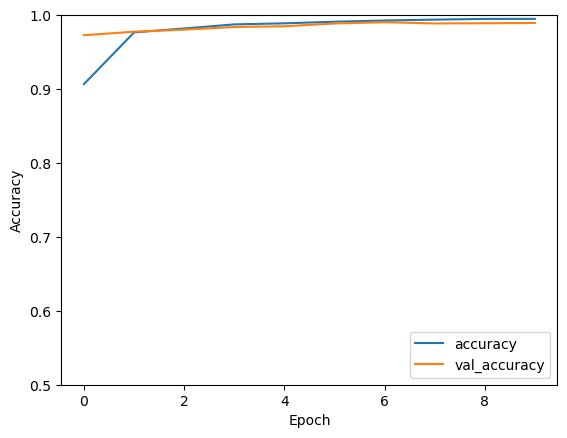

In [17]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

This is the Dense neaural network standard architecture evaluation


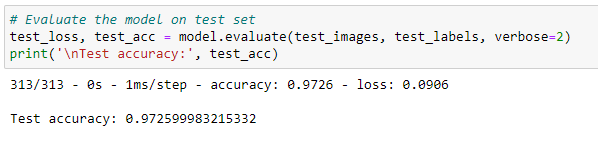

This is the CNN-LSTM hybrid 

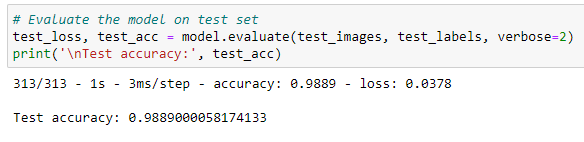

The juxtaposition of a CNN-LSTM hybrid against a simpler, densely connected neural network in processing the MNIST dataset has yielded insightful observations. Notably, the CNN-LSTM architecture, despite its extended computation time — approximately 15 seconds compared to the basic model's swift 3 seconds — demonstrated superior accuracy. However, the margin of improvement did not render the basic model obsolete; rather, it showcased commendable performance, especially considering its lack of convolutional and recurrent layers. This nuanced comparison underscores the hybrid model's potential advantages in scenarios requiring intricate pattern recognition and temporal data processing, suggesting its optimal deployment in more computationally intensive tasks and environments, potentially benefitting from the efficiencies of lower-level programming languages. The evaluation elucidates a critical insight: the choice of model architecture must be aligned with the complexity of the task at hand, balancing computational efficiency against the need for advanced data processing capabilities. Thus, while the CNN-LSTM hybrid emerges as a powerful tool for complex challenges, the basic neural network model retains its value for tasks where simplicity and speed are paramount